In [1]:
import noaa_coops as nc
import xarray as xr
import pandas as pd
from netCDF4 import Dataset, num2date
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import datetime as dt
from mpl_toolkits.basemap import Basemap

In [2]:
ds = xr.open_dataset('uwnd.mon.mean.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 73, level: 17, lon: 144, time: 882)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2021-06-01
Data variables:
    uwnd     (time, level, lat, lon) float32 ...
Attributes:
    title:          monthly mean u wind from the NCEP Reanalysis
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Mon Jul  5 22:36:33 1999: ncrcat uwnd.mon.mean.nc /Datase...
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [3]:
#variables
wspd = ds.variables['uwnd'][:]
time = ds.variables['time']
lon = ds.variables['lon'][:]
lat = ds.variables['lat'][:]
level = ds.variables['level'][:]
#create 2D lat and lon
import numpy as np
lon, lat = np.meshgrid(lon, lat)

In [4]:
#select for wspd variable from original dataset
uwnd_ds = ds['uwnd']
uwnd_ds

<xarray.DataArray 'uwnd' (time: 882, level: 17, lat: 73, lon: 144)>
[157616928 values with dtype=float32]
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2021-06-01
Attributes:
    long_name:     Monthly mean u wind
    units:         m/s
    precision:     2
    var_desc:      u-wind
    level_desc:    Multiple levels
    statistic:     Mean
    parent_stat:   Other
    valid_range:   [-125.  160.]
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-68.194824 124.399994]

In [5]:
#df = uwnd_ds.to_dataframe()
#df.loc['2000-05-31':'2021-05-31']

In [6]:
#select same time range as NTR and select for a single level
da_ = uwnd_ds.isel(time=slice(629, 882), level=1)
da_

<xarray.DataArray 'uwnd' (time: 253, lat: 73, lon: 144)>
[2659536 values with dtype=float32]
Coordinates:
    level    float32 925.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 2000-06-01 2000-07-01 ... 2021-06-01
Attributes:
    long_name:     Monthly mean u wind
    units:         m/s
    precision:     2
    var_desc:      u-wind
    level_desc:    Multiple levels
    statistic:     Mean
    parent_stat:   Other
    valid_range:   [-125.  160.]
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-68.194824 124.399994]

In [7]:
#make 2D to contain only lat and lon dimensions
Data=da_[0,:]
Data

<xarray.DataArray 'uwnd' (lat: 73, lon: 144)>
array([[  2.880005,   2.580002,   2.270004, ...,   3.740005,   3.459991,
          3.169998],
       [  2.830002,   2.520004,   2.209991, ...,   3.709991,   3.419998,
          3.130005],
       [  2.949997,   2.639999,   2.330002, ...,   3.789993,   3.529999,
          3.25    ],
       ...,
       [ -9.149994,  -8.649994,  -8.130005, ..., -10.479996, -10.070007,
         -9.630005],
       [ -7.100006,  -6.649994,  -6.169998, ...,  -8.360001,  -7.960007,
         -7.559998],
       [ -2.279999,  -1.889999,  -1.509995, ...,  -3.399994,  -3.040009,
         -2.649994]], dtype=float32)
Coordinates:
    level    float32 925.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    time     datetime64[ns] 2000-06-01
Attributes:
    long_name:     Monthly mean u wind
    units:         m/s
    precision:     2
    var_desc:      u-wind
    level_desc:    Multiple levels
    statistic:     Mean
    parent_stat:   Other
    valid_range:   [-125.  160.]
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-68.194824 124.399994]

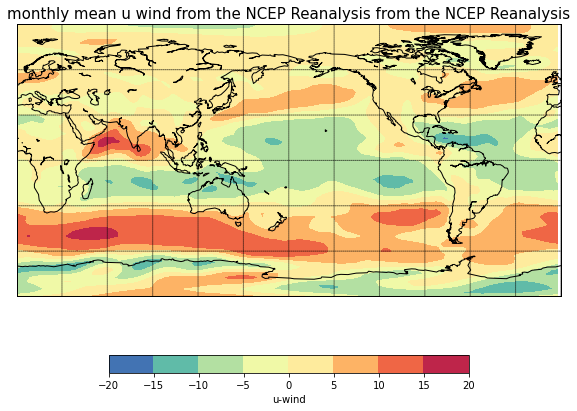

In [8]:
#create basemap
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(left=0., right=1., bottom=0., top=0.9)
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90,\
            llcrnrlon=0, urcrnrlon=360, resolution='c', lon_0=0)
m.drawcoastlines()
m.drawmapboundary()
# draw lat/lon grid lines every 30 degrees.
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))
# compute native map projection coordinates of lat/lon grid.
lats = da_['lat'].values
lons = da_['lon'].values

# find x,y of map projection grid.
lons, lats = np.meshgrid(lons, lats)
x, y = m(lons, lats)

cs = m.contourf(x, y, Data, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
plt.title('monthly mean u wind from the NCEP Reanalysis from the NCEP Reanalysis', 
          fontsize = 15)
cbar.set_label("u-wind")

In [9]:
#correlation function
def covariance(x, y, dims=None):
    return xr.dot(x - x.mean(dims), y - y.mean(dims), dims=dims) / x.count(dims)

def corrrelation(x, y, dims=None):
    return covariance(x, y, dims) / (x.std(dims) * y.std(dims))

In [10]:
#select time range and single level
uwind = uwnd_ds.isel(time=slice(629, 881), level=1)
uwnd_ = uwind.groupby('time.month').mean(dim='time')
uwnd_anom = uwind.groupby('time.month') - uwnd_

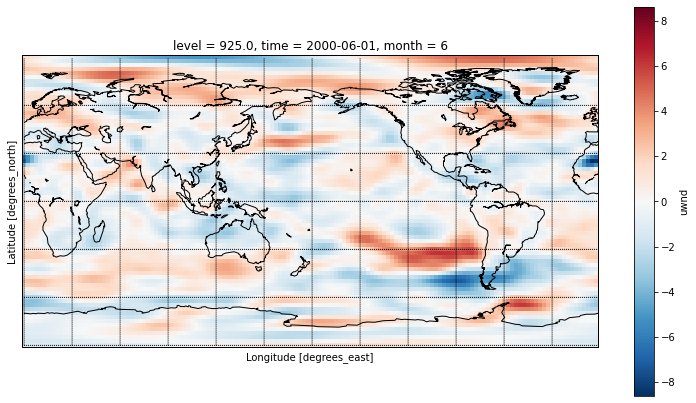

In [11]:
#basemap
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(left=0., right=1., bottom=0., top=0.9)
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90,\
            llcrnrlon=0, urcrnrlon=360, resolution='c', lon_0=0)
m.drawcoastlines()
m.drawmapboundary()
# draw lat/lon grid lines every 30 degrees.
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))
uwnd_anom[0].plot()


#plt.title('monthly u-wind anomaly', 
         #fontsize = 10)

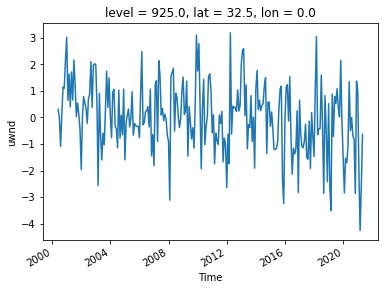

In [12]:
uwnd_ref = uwnd_anom.sel(lon=0, lat=32.7, method='nearest')
uwnd_ref.plot()
#uwnd anomaly at one point

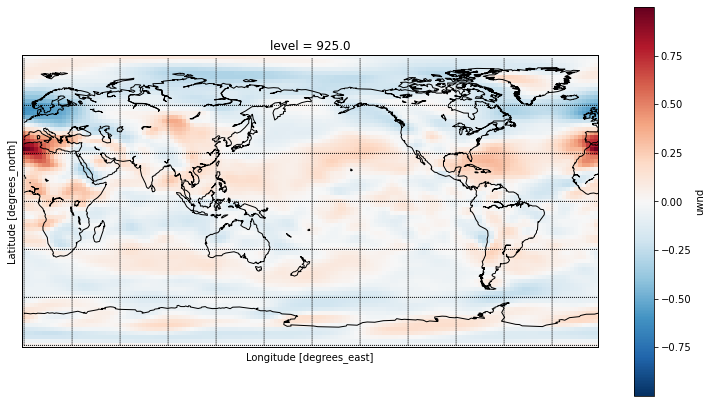

In [13]:
uwnd_cor = corrrelation(uwnd_anom, uwnd_ref, dims='time')
#wspd_cor= correlation(wspd_anom, ntr_, dims='time')
#basemap
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(left=0., right=1., bottom=0., top=0.9)
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90,\
            llcrnrlon=0, urcrnrlon=360, resolution='c', lon_0=0)
m.drawcoastlines()
m.drawmapboundary()
# draw lat/lon grid lines every 30 degrees.
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))

pc = uwnd_cor.plot()
#shows correlation of global average uwnd anomaly and uwnd at one point 

In [14]:
#open NTR montlhy avg
filename = 'New_ntr' + '.pkl'
NTR = pd.read_pickle(filename).rename(columns = {0:'NTR'}).rename_axis('time')
NTR
#NTR = NTR.rename(columns = {0:'NTR'})
#NTR = NTR.rename_axis('time')

,NTR
time,
2000-06-01,0.038814
2000-07-01,0.329288
2000-08-01,0.258997
2000-09-01,0.356960
2000-10-01,0.294539
...,...
2021-02-01,0.731364
2021-03-01,0.635345
2021-04-01,0.484349


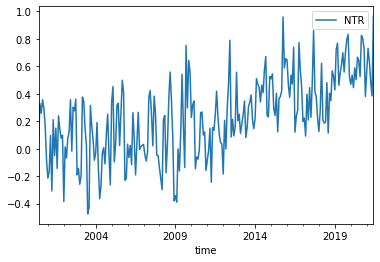

In [15]:
NTR.plot()

In [16]:
#convert NTR to xarray
ntrxr = NTR.to_xarray()
ntrxr

<xarray.Dataset>
Dimensions:  (time: 253)
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 2000-07-01 ... 2021-06-01
Data variables:
    NTR      (time) float64 0.03881 0.3293 0.259 0.357 ... 0.4843 0.3847 0.9654

In [ ]:
da = ntrxr.expand_dims({'lat':73})
Da=da.expand_dims({'lon':144})
#convert from dataset to dataarray so correlation function works
Da= Da.to_array()

In [ ]:
ntr_cor = corrrelation(da_, Da, dims='time')
ntr_cor

In [ ]:
ntr_cor = corrrelation(da_, Da, dims='time')
#basemap
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(left=0., right=1., bottom=0., top=0.9)
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90,\
            llcrnrlon=0, urcrnrlon=360, resolution='c', lon_0=0)
m.drawcoastlines()
m.drawmapboundary()
# draw lat/lon grid lines every 30 degrees.
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))

pc = ntr_cor.plot()
#shows correlation of U-wind and NTR  

In [ ]:
#xr.corr(da_, Da, dim = 'time')

In [ ]:
#n= Da.to_dataframe()
#u = da_.to_dataframe()
#N = ntrxr.to_dataframe()